In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, median_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
flats = pd.read_excel('drive/MyDrive/Датасеты/FLAT_PRICES.xlsx')

In [ ]:
flats.head()

,Id,SQUARE_METERS,METRO_DISTANCE,PRICE
0,601,28,677,7328400
1,602,54,120,9754600
2,603,43,1344,6781500
3,604,33,1003,6784100
4,605,30,591,7296200


In [ ]:
def mean_percentage_error(y, f):
  n = len(y)
  return 100 * sum([(y[i] - f[i]) / y[i] for i in range(n)]) / n

def absolute_deviation(y, f):
  n = len(y)
  return sum([abs(f[i] - y[i]) for i in range(n)])

def Theil_mismatch_coefficient(y, f):
  n = len(y)
  return sqrt(sum([(y[i] - f[i]) ** 2 for i in range(n)]) / (sum([y[i] ** 2 for i in range(n)]) + sum([f[i] ** 2 for i in range(n)])))

def calculate_metrics(y, f):
  print(f'MAE = {round(mean_absolute_error(y, f), 3)}')
  print(f'RMSE = {round(mean_squared_error(y, f), 3)}')
  print(f'MPE = {round(mean_percentage_error(y, f), 3)}')
  print(f'MAPE = {round(mean_absolute_percentage_error(y, f), 3)}')
  print(f'AD = {round(absolute_deviation(y, f), 3)}')
  print(f'MAD = {round(median_absolute_error(y, f), 3)}')
  print(f'R^2 = {round(r2_score(y, f), 3)}')
  print(f'ν = {round(Theil_mismatch_coefficient(y, f), 3)}')

# Прогнозирование по площади квартиры

In [ ]:
X, y = flats[['SQUARE_METERS']], flats['PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Линейная регрессия


In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Линейная регрессия: ')
calculate_metrics(y_true := list(y_test), y_pred := list(linear_regression_model.predict(X_test)))

Линейная регрессия: 
MAE = 843735.309
RMSE = 948091010455.922
MPE = -2.393
MAPE = 0.12
AD = 16874706.185
MAD = 743788.632
R^2 = 0.259
ν = 0.096


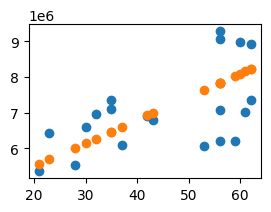

In [ ]:
plt.figure(figsize=(3, 2))
plt.scatter(list(X_test.SQUARE_METERS), y_true)
plt.scatter(list(X_test.SQUARE_METERS), y_pred)

## Квадратичная регрессия

In [ ]:
def polyfit(x, y, degree):
  results = {}
  coeffs = np.polyfit(x, y, degree)
  p = np.poly1d(coeffs)
  return p(x)

calculate_metrics(y, y_pred := polyfit(X.SQUARE_METERS.to_numpy(), y.to_numpy(), 2))

MAE = 985835.835
RMSE = 1292317198910.848
MPE = -3.228
MAPE = 0.156
AD = 98583583.496
MAD = 970954.709
R^2 = 0.457
ν = 0.115


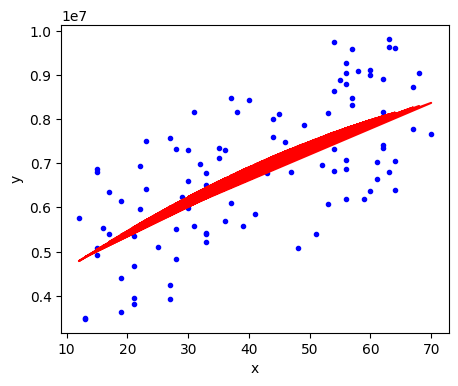

In [ ]:
plt.figure(figsize = (5, 4))
plt.plot(X.SQUARE_METERS, y, 'b.')
plt.plot(X.SQUARE_METERS, y_pred, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Прогнозирование по расстоянию до метро

In [ ]:
X, y = flats.drop(['Id', 'PRICE', 'SQUARE_METERS'], axis=1), flats.PRICE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Линейная регрессия

In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
print('Линейная регрессия: ')
calculate_metrics(y_true := list(y_test), y_pred := list(linear_regression_model.predict(X_test)))

Линейная регрессия: 
MAE = 905691.049
RMSE = 1091461080005.704
MPE = -4.303
MAPE = 0.146
AD = 18113820.971
MAD = 1073634.998
R^2 = 0.612
ν = 0.107


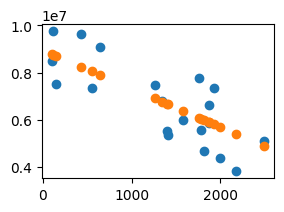

In [ ]:
plt.figure(figsize=(3, 2))
plt.scatter(list(X_test.METRO_DISTANCE), y_true)
plt.scatter(list(X_test.METRO_DISTANCE), y_pred)

## Квадратичная регрессия

In [ ]:
def polyfit(x, y, degree):
  results = {}
  coeffs = np.polyfit(x, y, degree)
  p = np.poly1d(coeffs)
  return p(x)

calculate_metrics(y, y_pred := polyfit(X.METRO_DISTANCE.to_numpy(), y.to_numpy(), 2))

MAE = 870647.231
RMSE = 1005634175510.541
MPE = -2.569
MAPE = 0.138
AD = 87064723.061
MAD = 875303.471
R^2 = 0.578
ν = 0.101


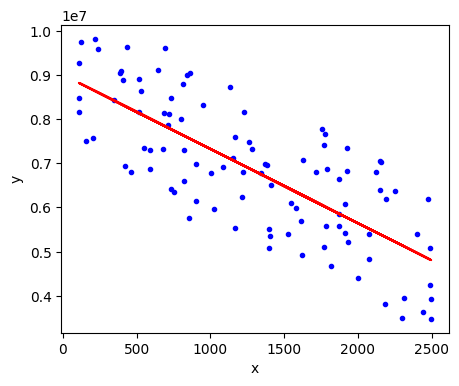

In [ ]:
plt.figure(figsize = (5, 4))
plt.plot(X.METRO_DISTANCE, y, 'b.')
plt.plot(X.METRO_DISTANCE, y_pred, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Прогнозирование по обоим параметрам

In [ ]:
X, y = flats.drop(['Id', 'PRICE'], axis=1), flats.PRICE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Линейная регрессия

In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
print('Линейная регрессия: ')
calculate_metrics(list(y_test), list(linear_regression_model.predict(X_test)))

Линейная регрессия: 
MAE = 198589.337
RMSE = 61246540429.157
MPE = 0.747
MAPE = 0.031
AD = 3971786.74
MAD = 168463.975
R^2 = 0.954
ν = 0.026
